#Comparing Full Gradient Descent and Random Block-Coordinate Gradient Descent

## An Empirical Analysis of Optimization Algorithms

Of course. Here is a title and description for your notebook.

Comparing Full Gradient Descent and Random Block-Coordinate Gradient Descent
An Empirical Analysis of Optimization Algorithms
This notebook provides a practical comparison between two fundamental optimization algorithms: Full Gradient Descent (GD) and Random Block-Coordinate Gradient Descent (RBC-GD). We implement both methods from scratch in Python to find the minimum of a simple convex function and analyze their performance based on convergence path, speed, and computational efficiency.

The objective is to minimize the following two-dimensional quadratic function:

$$
f(x_1, x_2) = (x_1 - 1)^2 + (x_2 - 2)^2
$$


This function has a clear, unique minimum at the point (1,2), making it an ideal test case for visualizing and understanding how these algorithms navigate the parameter space.

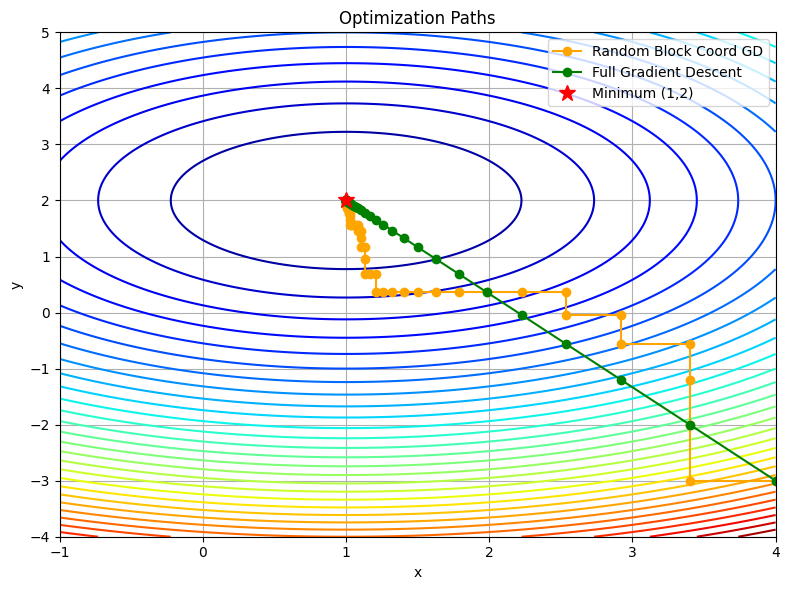

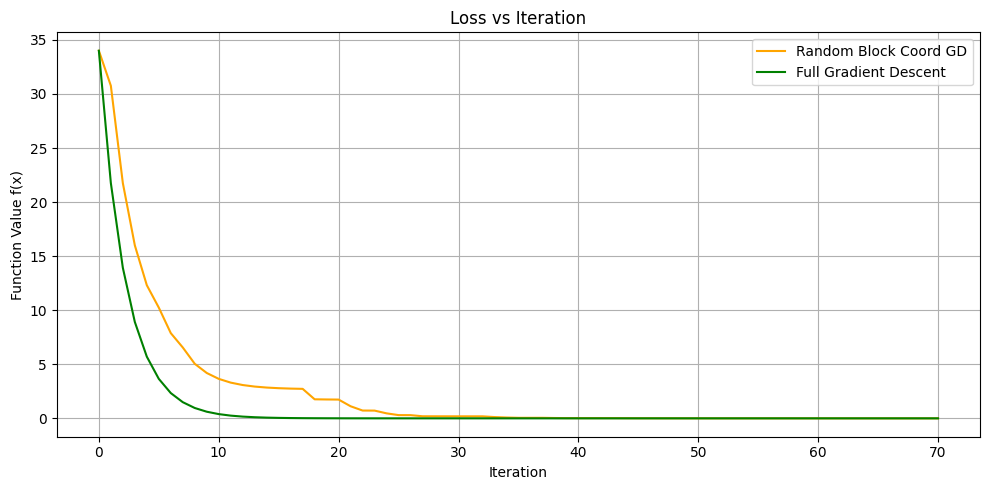

Average time for Random Block-Coordinate GD over 65 runs: 0.000363 seconds
Average time for Full Gradient Descent over 65 runs: 0.000258 seconds
Final function value for Random Block-Coordinate GD: 0.000053
Final function value for Full Gradient Descent: 0.000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Function and gradient
def f(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2

def grad_f(x):
    return np.array([2 * (x[0] - 1), 2 * (x[1] - 2)])

# Random Block-Coordinate Gradient Descent
def random_block_coordinate_gd(start, step_size=0.1, iterations=70):
    x = np.array(start)
    path = [x.copy()]
    for _ in range(iterations):
        grad = grad_f(x)
        coord = random.choice([0, 1])  # Randomly choose coordinate
        x[coord] -= step_size * grad[coord]
        path.append(x.copy())
    return np.array(path)

# Full Gradient Descent
def full_gradient_descent(start, step_size=0.1, iterations=70):
    x = np.array(start)
    path = [x.copy()]
    for _ in range(iterations):
        grad = grad_f(x)
        x -= step_size * grad
        path.append(x.copy())
    return np.array(path)

# Run both algorithms
start_point = [4.0, -3.0]
rbc_path = random_block_coordinate_gd(start_point)
full_path = full_gradient_descent(start_point)

# Calculate function values for each iteration
rbc_f_values = [f(x) for x in rbc_path]
full_f_values = [f(x) for x in full_path]

# Plotting Optimization Paths (Original Contour Plot)
fig, ax = plt.subplots(figsize=(8, 6))
x_vals = np.linspace(-1, 4, 400)
y_vals = np.linspace(-4, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X - 1)**2 + (Y - 2)**2
ax.contour(X, Y, Z, levels=30, cmap='jet')
ax.plot(rbc_path[:, 0], rbc_path[:, 1], 'o-', label='Random Block Coord GD', color='orange')
ax.plot(full_path[:, 0], full_path[:, 1], 'o-', label='Full Gradient Descent', color='green')
ax.plot(1, 2, 'r*', markersize=12, label='Minimum (1,2)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Optimization Paths')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting: Loss vs Iteration
fig, ax1 = plt.subplots(figsize=(10, 5))

# Loss vs Iteration
ax1.plot(rbc_f_values, label='Random Block Coord GD', color='orange')
ax1.plot(full_f_values, label='Full Gradient Descent', color='green')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Function Value f(x)')
ax1.set_title('Loss vs Iteration')
ax1.legend()
ax1.grid(True)

plt.tight_layout()
plt.show()

import time

def average_runtime(func, runs=100, *args, **kwargs):
    total_time = 0.0
    for _ in range(runs):
        start = time.perf_counter()
        func(*args, **kwargs)
        end = time.perf_counter()
        total_time += (end - start)
    return total_time / runs

# Parameters
runs = 65
start_point = [4.0, -3.0]

# Measure average time for Random Block-Coordinate GD
avg_time_rbc = average_runtime(random_block_coordinate_gd, runs, start_point)
print(f"Average time for Random Block-Coordinate GD over {runs} runs: {avg_time_rbc:.6f} seconds")

# Measure average time for Full Gradient Descent
avg_time_full = average_runtime(full_gradient_descent, runs, start_point)
print(f"Average time for Full Gradient Descent over {runs} runs: {avg_time_full:.6f} seconds")

# Final function values
final_value_rbc = f(random_block_coordinate_gd(start_point)[-1])
final_value_full = f(full_gradient_descent(start_point)[-1])

print(f"Final function value for Random Block-Coordinate GD: {final_value_rbc:.6f}")
print(f"Final function value for Full Gradient Descent: {final_value_full:.6f}")

# Case Study: Applying GD and RBC-GD to Logistic Regression
Now, let's extend our comparison to a practical machine learning problem: binary classification using Logistic Regression. Unlike the simple quadratic function, the logistic loss function is more complex, making this a more realistic test of how these optimization algorithms perform.

The goal of logistic regression is to find a set of weights, w, that best separates the classes in the data. The model predicts the probability of an instance belonging to the positive class using the sigmoid function:

$$
\hat{p} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$


where z=Xw. The optimization objective is to minimize the logistic loss (also known as cross-entropy loss) over the training data.

RBC-GD Time: 1.3573 seconds
Standard GD Time: 1.3121 seconds


<ipython-input-9-45170e5c0db5>:102: UserWarning: The following kwargs were not used by contour: 'label'
  ax3.contour(xx, yy, sigmoid(np.c_[xx.ravel(), yy.ravel()] @ rbc_final_w).reshape(xx.shape),
<ipython-input-9-45170e5c0db5>:104: UserWarning: The following kwargs were not used by contour: 'label'
  ax3.contour(xx, yy, sigmoid(np.c_[xx.ravel(), yy.ravel()] @ std_final_w).reshape(xx.shape),


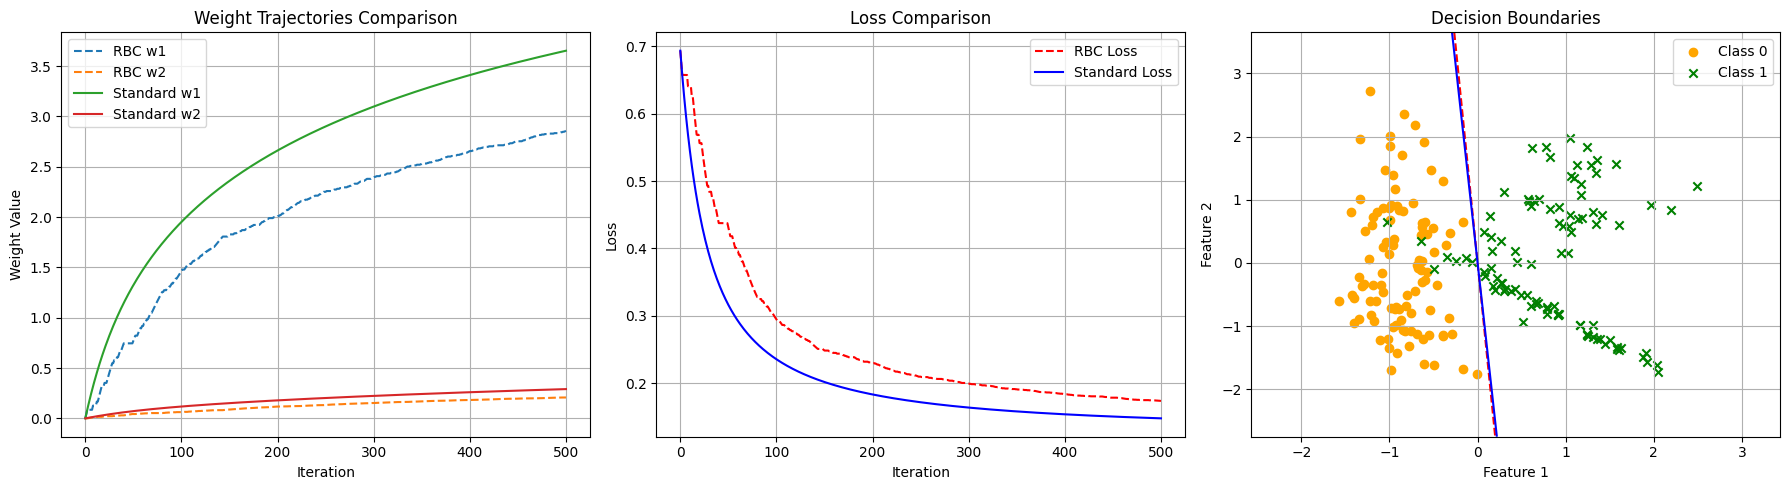

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import time

# Generate a binary classification dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=43)
X = StandardScaler().fit_transform(X)
y = y.reshape(-1, 1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss(X, y, w):
    z = X @ w
    predictions = sigmoid(z)
    return log_loss(y, predictions)

def logistic_grad(X, y, w):
    m = X.shape[0]
    predictions = sigmoid(X @ w)
    return (1 / m) * X.T @ (predictions - y)

def rbc_logistic_regression(X, y, step_size=0.1, iterations=500):
    n_features = X.shape[1]
    w = np.zeros((n_features, 1))
    path = [w.flatten().copy()]
    losses = [logistic_loss(X, y, w)]

    start_time = time.time()

    for _ in range(iterations):
        grad = logistic_grad(X, y, w)
        coord = np.random.choice(n_features)
        w[coord] -= step_size * grad[coord]
        path.append(w.flatten().copy())
        losses.append(logistic_loss(X, y, w))

    elapsed_time = time.time() - start_time
    print(f"RBC-GD Time: {elapsed_time:.4f} seconds")
    return np.array(path), losses

def standard_logistic_regression(X, y, step_size=0.1, iterations=500):
    n_features = X.shape[1]
    w = np.zeros((n_features, 1))
    path = [w.flatten().copy()]
    losses = [logistic_loss(X, y, w)]

    start_time = time.time()

    for _ in range(iterations):
        grad = logistic_grad(X, y, w)
        w -= step_size * grad
        path.append(w.flatten().copy())
        losses.append(logistic_loss(X, y, w))

    elapsed_time = time.time() - start_time
    print(f"Standard GD Time: {elapsed_time:.4f} seconds")
    return np.array(path), losses

# Run both algorithms with timing
rbc_weights_path, rbc_loss_values = rbc_logistic_regression(X, y)
std_weights_path, std_loss_values = standard_logistic_regression(X, y)

# Create comparison plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Weight trajectories
ax1.plot(rbc_weights_path[:, 0], label='RBC w1', linestyle='--')
ax1.plot(rbc_weights_path[:, 1], label='RBC w2', linestyle='--')
ax1.plot(std_weights_path[:, 0], label='Standard w1')
ax1.plot(std_weights_path[:, 1], label='Standard w2')
ax1.set_title('Weight Trajectories Comparison')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Weight Value')
ax1.legend()
ax1.grid(True)

# Loss comparison
ax2.plot(rbc_loss_values, label='RBC Loss', linestyle='--', color='red')
ax2.plot(std_loss_values, label='Standard Loss', color='blue')
ax2.set_title('Loss Comparison')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Decision boundaries
# Create a grid to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get final weights from both methods
rbc_final_w = rbc_weights_path[-1].reshape(-1, 1)
std_final_w = std_weights_path[-1].reshape(-1, 1)

# Plot decision boundaries and data points
ax3.contour(xx, yy, sigmoid(np.c_[xx.ravel(), yy.ravel()] @ rbc_final_w).reshape(xx.shape),
           levels=[0.5], colors='red', linestyles='--', label='RBC Boundary')
ax3.contour(xx, yy, sigmoid(np.c_[xx.ravel(), yy.ravel()] @ std_final_w).reshape(xx.shape),
           levels=[0.5], colors='blue', label='Standard Boundary')

# Plot the data points
ax3.scatter(X[y.ravel() == 0, 0], X[y.ravel() == 0, 1], c='orange', marker='o', label='Class 0')
ax3.scatter(X[y.ravel() == 1, 0], X[y.ravel() == 1, 1], c='green', marker='x', label='Class 1')
ax3.set_title('Decision Boundaries')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

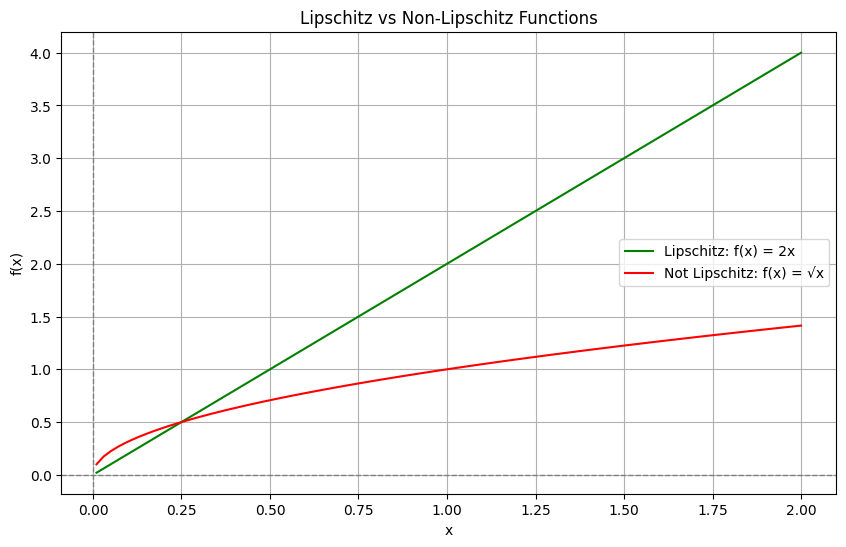

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define two functions
def lipschitz_f(x):
    return 2 * x  # Lipschitz continuous (L = 2)

def non_lipschitz_f(x):
    return np.sqrt(x)  # Not Lipschitz continuous at x = 0 (slope → ∞)

# Define x values
x = np.linspace(0.01, 2, 100)  # avoid 0 to prevent sqrt(0) issue

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, lipschitz_f(x), label='Lipschitz: f(x) = 2x', color='green')
plt.plot(x, non_lipschitz_f(x), label='Not Lipschitz: f(x) = √x', color='red')

# Formatting
plt.title('Lipschitz vs Non-Lipschitz Functions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

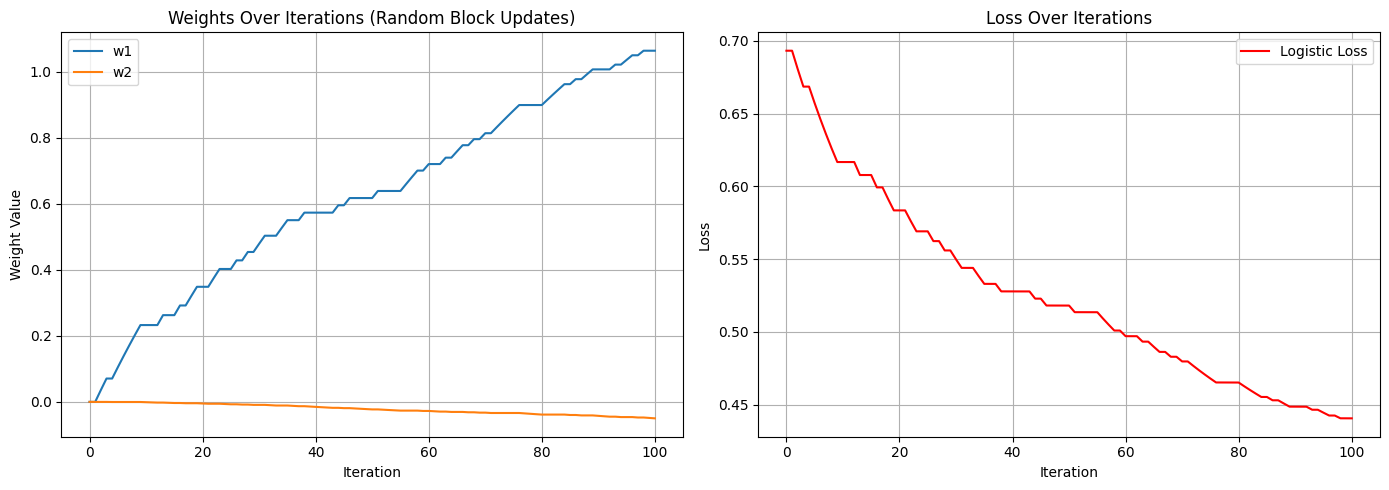

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Generate a binary classification dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X = StandardScaler().fit_transform(X)
y = y.reshape(-1, 1)  # Convert to column vector

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic loss
def logistic_loss(X, y, w):
    z = X @ w
    predictions = sigmoid(z)
    return log_loss(y, predictions)

# Gradient of logistic loss
def logistic_grad(X, y, w):
    m = X.shape[0]
    predictions = sigmoid(X @ w)
    return (1 / m) * X.T @ (predictions - y)

# Random block-coordinate gradient descent for logistic regression
def rbc_logistic_regression(X, y, step_size=0.1, iterations=100):
    n_features = X.shape[1]
    w = np.zeros((n_features, 1))
    path = [w.flatten().copy()]
    losses = [logistic_loss(X, y, w)]

    for _ in range(iterations):
        grad = logistic_grad(X, y, w)
        coord = np.random.choice(n_features)  # Pick a random coordinate to update
        w[coord] -= step_size * grad[coord]
        path.append(w.flatten().copy())
        losses.append(logistic_loss(X, y, w))

    return np.array(path), losses

# Run the RBC logistic regression
weights_path, loss_values = rbc_logistic_regression(X, y)

# Plot the path of weights and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Weight trajectory
ax1.plot(weights_path[:, 0], label='w1')
ax1.plot(weights_path[:, 1], label='w2')
ax1.set_title('Weights Over Iterations (Random Block Updates)')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Weight Value')
ax1.legend()
ax1.grid(True)

# Loss over time
ax2.plot(loss_values, label='Logistic Loss', color='red')
ax2.set_title('Loss Over Iterations')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

**Applied Logistic Regression**

In [ ]:
!pip install ace_tools  # Install the ace_tools library

,w1_rbc,w2_rbc,loss_rbc,w1_full,w2_full,loss_full
0,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147
1,0.035774,0.000000,0.680509,0.035774,-0.000110,0.680509
2,0.035774,-0.000190,0.680509,0.070654,-0.000297,0.668494
3,0.035774,-0.000374,0.680509,0.104665,-0.000556,0.657070
4,0.035774,-0.000555,0.680508,0.137829,-0.000885,0.646207
...,...,...,...,...,...,...
96,1.128490,-0.042881,0.432167,1.554026,-0.105786,0.388671
97,1.141135,-0.042881,0.430579,1.561739,-0.106912,0.388066
98,1.153602,-0.042881,0.429036,1.569379,-0.108034,0.387473
99,1.153602,-0.044428,0.429012,1.576945,-0.109150,0.386891


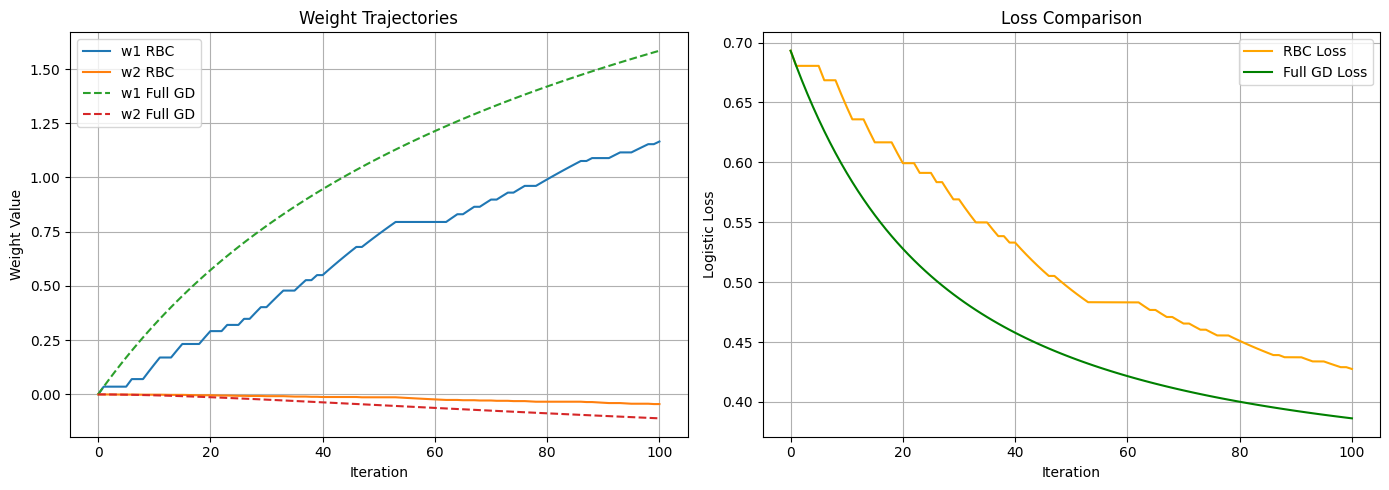

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import pandas as pd
from IPython.display import display

# Generate a binary classification dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X = StandardScaler().fit_transform(X)
y = y.reshape(-1, 1)  # Convert to column vector

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic loss
def logistic_loss(X, y, w):
    z = X @ w
    predictions = sigmoid(z)
    return log_loss(y, predictions)

# Gradient of logistic loss
def logistic_grad(X, y, w):
    m = X.shape[0]
    predictions = sigmoid(X @ w)
    return (1 / m) * X.T @ (predictions - y)

# Random block-coordinate gradient descent for logistic regression
def rbc_logistic_regression(X, y, step_size=0.1, iterations=100):
    n_features = X.shape[1]
    w = np.zeros((n_features, 1))
    path = [w.flatten().copy()]
    losses = [logistic_loss(X, y, w)]

    for _ in range(iterations):
        grad = logistic_grad(X, y, w)
        coord = np.random.choice(n_features)  # Pick a random coordinate to update
        w[coord] -= step_size * grad[coord]
        path.append(w.flatten().copy())
        losses.append(logistic_loss(X, y, w))

    return np.array(path), losses

# Full Gradient Descent for logistic regression
def full_logistic_regression(X, y, step_size=0.1, iterations=100):
    n_features = X.shape[1]
    w = np.zeros((n_features, 1))
    path = [w.flatten().copy()]
    losses = [logistic_loss(X, y, w)]

    for _ in range(iterations):
        grad = logistic_grad(X, y, w)
        w -= step_size * grad  # Update all coordinates at once
        path.append(w.flatten().copy())
        losses.append(logistic_loss(X, y, w))

    return np.array(path), losses

# ✅ First run both algorithms
rbc_weights_path, rbc_loss_values = rbc_logistic_regression(X, y)
full_weights_path, full_loss_values = full_logistic_regression(X, y)

# ✅ Now create DataFrames
rbc_results = pd.DataFrame(rbc_weights_path, columns=['w1_rbc', 'w2_rbc'])
rbc_results['loss_rbc'] = rbc_loss_values

full_results = pd.DataFrame(full_weights_path, columns=['w1_full', 'w2_full'])
full_results['loss_full'] = full_loss_values

# ✅ Combine both into a single comparison table
combined_results = rbc_results.join(full_results)

display(combined_results)

# ✅ Plot comparison
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot weight trajectories
axs[0].plot(rbc_weights_path[:, 0], label='w1 RBC')
axs[0].plot(rbc_weights_path[:, 1], label='w2 RBC')
axs[0].plot(full_weights_path[:, 0], label='w1 Full GD', linestyle='--')
axs[0].plot(full_weights_path[:, 1], label='w2 Full GD', linestyle='--')
axs[0].set_title('Weight Trajectories')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Weight Value')
axs[0].legend()
axs[0].grid(True)

# Plot loss values
axs[1].plot(rbc_loss_values, label='RBC Loss', color='orange')
axs[1].plot(full_loss_values, label='Full GD Loss', color='green')
axs[1].set_title('Loss Comparison')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Logistic Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Configuration
n_samples   = 500
n_features  = 20
block_size  = 5    # how many weights to update each step
iterations  = 100
step_size   = 0.1

# 1) Create data
X, y = make_classification(n_samples=n_samples,
                           n_features=n_features,
                           n_informative=10,
                           n_redundant=0,
                           random_state=42)
X = StandardScaler().fit_transform(X)
y = y.reshape(-1, 1)

# 2) Helpers
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_loss(X, y, w):
    p = sigmoid(X @ w)
    return log_loss(y, p)

def logistic_grad(X, y, w):
    m = X.shape[0]
    p = sigmoid(X @ w)
    return (1/m) * X.T @ (p - y)

# 3) Random Block‑Coordinate GD
def rbc_logistic_regression_block(X, y, step_size, iterations, block_size):
    n = X.shape[1]
    w = np.zeros((n,1))
    losses = [logistic_loss(X,y,w)]
    for _ in range(iterations):
        g = logistic_grad(X, y, w)
        # pick block_size random coords
        idx = np.random.choice(n, size=block_size, replace=False)
        w[idx] -= step_size * g[idx]
        losses.append(logistic_loss(X, y, w))
    return losses

# 4) Full Gradient Descent
def full_logistic_regression(X, y, step_size, iterations):
    n = X.shape[1]
    w = np.zeros((n,1))
    losses = [logistic_loss(X,y,w)]
    for _ in range(iterations):
        g = logistic_grad(X, y, w)
        w -= step_size * g
        losses.append(logistic_loss(X, y, w))
    return losses

# 5) Run & compare
loss_rbc  = rbc_logistic_regression_block(X, y, step_size, iterations, block_size)
loss_full = full_logistic_regression       (X, y, step_size, iterations)

# 6) Tabulate the first few results
df = pd.DataFrame({
    'iteration': list(range(iterations+1)),
    'loss_rbc': loss_rbc,
    'loss_full': loss_full
})
print(df.head(20))

# 7) Print final losses
print(f"\nFinal RBCGD Loss: {loss_rbc[-1]:.4f}")
print(f"Final Full‑GD Loss: {loss_full[-1]:.4f}")


    iteration  loss_rbc  loss_full
0           0  0.693147   0.693147
1           1  0.688146   0.676456
2           2  0.684996   0.661143
3           3  0.678833   0.647078
4           4  0.677260   0.634144
5           5  0.671130   0.622230
6           6  0.668330   0.611238
7           7  0.666527   0.601078
8           8  0.666417   0.591671
9           9  0.663816   0.582943
10         10  0.660777   0.574831
11         11  0.651870   0.567276
12         12  0.649348   0.560227
13         13  0.646999   0.553638
14         14  0.640380   0.547469
15         15  0.638887   0.541681
16         16  0.631641   0.536243
17         17  0.628126   0.531124
18         18  0.622379   0.526299
19         19  0.619056   0.521744

Final RBCGD Loss: 0.4921
Final Full‑GD Loss: 0.4142


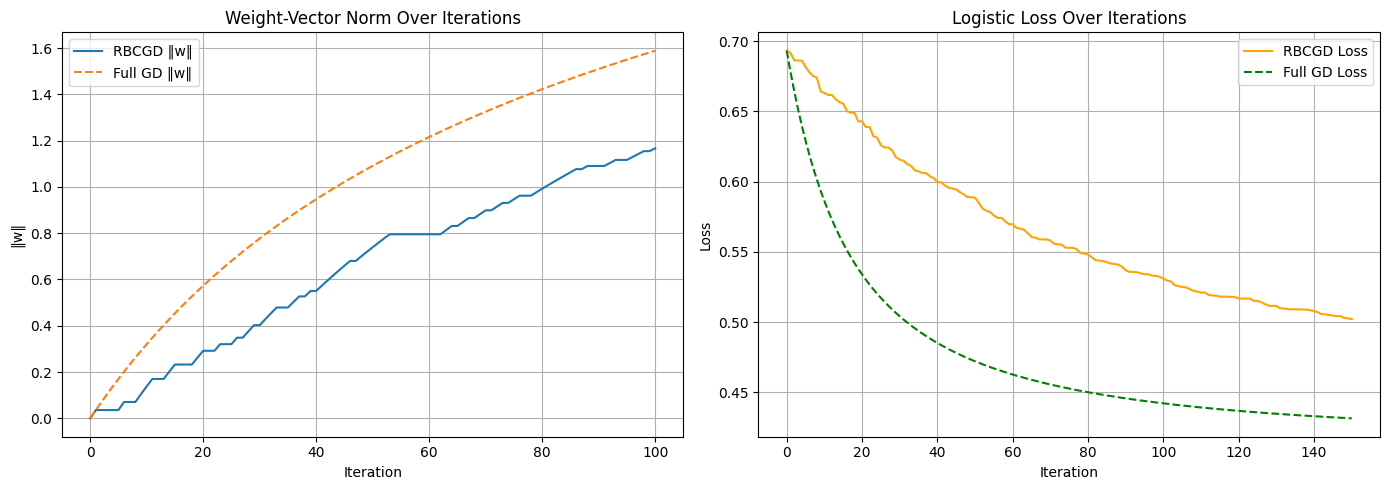

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt


# Configuration
n_samples = 50000
n_features = 1000
block_size = 200  # Number of features to update per iteration
iterations = 150
step_size = 0.1

# Generate a binary classification dataset with more features
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=10,
                           n_redundant=0, n_clusters_per_class=2, random_state=42)
X = StandardScaler().fit_transform(X)
y = y.reshape(-1, 1)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic loss
def logistic_loss(X, y, w):
    preds = sigmoid(X @ w)
    return log_loss(y, preds)

# Gradient of logistic loss
def logistic_grad(X, y, w):
    m = X.shape[0]
    preds = sigmoid(X @ w)
    return (1 / m) * X.T @ (preds - y)

# Random block-coordinate gradient descent for logistic regression
def rbc_logistic_regression_block(X, y, step_size, iterations, block_size):
    n_features = X.shape[1]
    w = np.zeros((n_features, 1))
    losses = [logistic_loss(X, y, w)]

    for _ in range(iterations):
        grad = logistic_grad(X, y, w)
        coords = np.random.choice(n_features, size=block_size, replace=False)
        w[coords] -= step_size * grad[coords]
        losses.append(logistic_loss(X, y, w))

    return losses

# Full Gradient Descent
def full_logistic_regression(X, y, step_size, iterations):
    n_features = X.shape[1]
    w = np.zeros((n_features, 1))
    losses = [logistic_loss(X, y, w)]

    for _ in range(iterations):
        grad = logistic_grad(X, y, w)
        w -= step_size * grad
        losses.append(logistic_loss(X, y, w))

    return losses

# Run both methods
loss_rbc = rbc_logistic_regression_block(X, y, step_size, iterations, block_size)
loss_full = full_logistic_regression(X, y, step_size, iterations)

# Prepare a DataFrame for comparison
results = pd.DataFrame({
    'iteration': range(iterations + 1),
    'loss_rbc': loss_rbc,
    'loss_full': loss_full
})


fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# 1) Weight‐vector norm over iterations
rbc_norm  = np.linalg.norm(rbc_weights_path, axis=1)
full_norm = np.linalg.norm(full_weights_path, axis=1)

axs[0].plot(rbc_norm,  label='RBCGD ‖w‖')
axs[0].plot(full_norm, label='Full GD ‖w‖', linestyle='--')
axs[0].set_title('Weight‐Vector Norm Over Iterations')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('‖w‖')
axs[0].legend()
axs[0].grid(True)

# 2) Loss comparison
axs[1].plot(loss_rbc,  label='RBCGD Loss', color='orange')
axs[1].plot(loss_full, label='Full GD Loss', color='green', linestyle='--')
axs[1].set_title('Logistic Loss Over Iterations')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()